# Importing packages:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

pd.set_option("display.float.format",lambda x: locale.format('%.2f',x,grouping=True))
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# importing all packages required for building a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler            
from sklearn.feature_selection import RFE           
from sklearn.metrics import accuracy_score ,roc_curve,roc_auc_score,precision_recall_curve
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing all packages required for building a linear regression model
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Data Understanding:

In [3]:
df=pd.read_csv('midtermgentdataFinal.csv')

In [4]:
df.head(3)

,pin14,area,area_num_1,assessorbl,assessornb,censustrac,chicagowar,comarea,comarea_id,commission,community,congressio,elemschlta,highschlta,parceltype,perimeter,politicalt,staterepre,statesenat,taxcode,tifdistric,unitschlta,Year,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),Appeal filed with CCAO,CCAO reviews,CCAO adjustment indicator,Appeal filed with BOR,BOR adjustment indicator,Property Index Number,Assessment Triad,Property Class,Property Address,Property Apartment Num.,Property City,Township me,Township Code2,Neighborhood Code,Township Neighborhood Only,Modeling Group,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Sale Date,Sale Price,Sale Document Number,Land Square Feet,Large Home Indicator,Age,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Fireplaces,Attic Type,Full Baths,Half Baths,Design Plan,Cathedral Ceiling,Garage 1 Size,Garage 1 Material,Garage 1 Attached,Garage 1 Area,Building Square Feet,Repair Condition,Use,Type of Residence,Attic Finish,Renovation,Porch,Property Zip Code,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,Condo Model: Building PIN,Condo Model: Modeled Unit Strata (of 10),Condo Model: Modeled Unit Strata (of 300),Modeled Sale Year,Modeled Sale Month of Year,Modeled Sale Day of Year,Modeled Sale Week of Year,Modeled Sale Quarter of Year,Modeled Sale Quarter,Modeled Sale Month,Modeled Sale Week,Modeled Sale Day,Modeled Sale During School Year,Modeled Sale During Holidays,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - All Residential Properties,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
0,24-23-106-003-0000,0,74,NaN,NaN,17031740400,19,0,0,11,MOUNT GREENWOOD,3,NaN,NaN,1,0,Town of Lake,35,18,NaN,NaN,BOARD OF EDUCATION,2020,203,Lake,72,422,72003,22701,20884,20884,False,0,False,False,False,24-23-106-003-0000,City,203,3611 W 112TH PL,NaN,CHICAGO,Lake,72,72422,422,SF,1.00,0,2.00,0,0,NaN,NaN,NaN,4950,False,66,NaN,Frame,Shingle + Asphalt,4,3,Slab,Unfinished,Warm Air Furce,No Central A/C,0.00,None,1,0,NaN,NaN,1 cars,Frame,False,False,1165,Average,Single-Family,1 Story,NaN,NaN,NaN,60655-3401,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,NaN,NaN,NaN,2021,Jan,1,1,Q1,96,288,1252,8766,True,True,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,1,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
1,24-23-104-003-0000,0,74,NaN,NaN,17031740400,19,0,0,11,MOUNT GREENWOOD,3,NaN,NaN,1,0,Town of Lake,35,18,NaN,NaN,BOARD OF EDUCATION

In [5]:
df.shape

(201092, 144)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201092 entries, 0 to 201091
Columns: 144 entries, pin14 to Comm - Total Population
dtypes: bool(7), float64(38), int64(60), object(39)
memory usage: 211.5+ MB


In [7]:
df.describe()

,area,area_num_1,assessorbl,assessornb,censustrac,chicagowar,comarea,comarea_id,commission,congressio,elemschlta,highschlta,parceltype,perimeter,staterepre,statesenat,taxcode,Year,Class,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO reviews,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Sale Price,Sale Document Number,Land Square Feet,Age,Apartments,Rooms,Bedrooms,Fireplaces,Full Baths,Half Baths,Building Square Feet,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Tax Rate,Tract Median Income,Condo Model: Building PIN,Condo Model: Modeled Unit Strata (of 10),Condo Model: Modeled Unit Strata (of 300),Modeled Sale Year,Modeled Sale Day of Year,Modeled Sale Week of Year,Modeled Sale Quarter,Modeled Sale Month,Modeled Sale Week,Modeled Sale Day,CommsortIndex,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - All Residential Properties,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
count,"201,092.00","201,092.00","102,762.00","102,762.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00",0.00,0.00,"201,092.00","201,092.00","201,092.00","201,092.00",0.00,"201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,017.00","201,092.00","201,092.00","19,602.00","19,602.00","201,092.00","201,092.00",0.00,"201,092.00","201,092.00","201,024.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00",0.00,0.00,0.00,"201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00"
mean,0.00,44.74,203.06,174.75,"17,031,479,303.28",23.51,0.00,0.00,7.14,3.44,NaN,NaN,1.00,0.00,22.28,11.42,NaN,"2,020.00",202.94,71.89,193.06,"71,915.79","19,725.27","17,707.54","17,663.25",0.03,202.76,71.89,"72,079.12",193.06,0.99,0.01,2.02,0.01,0.01,"231,440.61","1,919,250,738.75","4,107.87",85.95,NaN,5.34,2.80,0.07,1.16,0.22,"1,173.38",0.02,0.00,1.82,0.16,0.00,0.06,6.91,"56,387.27",NaN,NaN,NaN,"2,021.00",1.00,1.00,96.00,288.00,"1,252.00","8,766.00",36.13,4.0

# Data cleaning:

## Null values:

In [8]:
df.size

28957248

In [9]:
df.isnull().sum().sum()

3311132

In [10]:
# Null values percentage

(df.isnull().sum().sum()/df.size)*100

11.434553449278052

In [11]:
# In total, 11.4% values are null in the data.

In [12]:
x = pd.DataFrame()
x['Columns'] = df.columns
x['Data_type']  = df.dtypes.values
x['Unique_count'] = df.nunique().values
x['null_value_percentage'] = df.isnull().sum().values*100/len(df)
x['null_value_percentage'] = x['null_value_percentage'].apply(lambda x: round(x,2))
x=x.sort_values(by='null_value_percentage',ascending=False)            
# creating a new dataframe with column names,Data type,Unique values and their percentage of null values sort
# on descending order of null_value_percentage
x

,Columns,Data_type,Unique_count,null_value_percentage
19,taxcode,float64,0,100.00
95,Condo Model: Building PIN,float64,0,100.00
96,Condo Model: Modeled Unit Strata (of 10),float64,0,100.00
97,Condo Model: Modeled Unit Strata (of 300),float64,0,100.00
13,highschlta,float64,0,100.00
12,elemschlta,float64,0,100.00
58,Apartments,float64,0,100.00
82,Renovation,object,2,99.85
40,Property Apartment Num.,object,203,93.47
20,tifdistric,object,88,90.90


In [13]:
# dropping columns with more than 40% null values

null_df=x[x['null_value_percentage']>40]
df.drop(list(null_df.Columns),axis=1,inplace=True)

In [14]:
df.shape

(201092, 125)

In [15]:
(df.isnull().sum().sum()/df.size)*100

0.48052831539792734

In [16]:
#Imputing the remaining null values,we use mean to impute null values in numerical variables and mode for categorical variables.
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
df.isnull().sum().sum()

0

## Deleting columns with one unique value

In [18]:
# some of the columns have only one unique values, which makes them insignificant for modeling.
# so, we can drop those variables.

unique_df=x[x['Unique_count']==1]
df.drop(list(unique_df.Columns),axis=1,inplace=True)

In [19]:
df.shape

(201092, 102)

## Checking for duplicates:    

In [20]:
df.duplicated().value_counts()

False    201082
True         10
dtype: int64

In [21]:
# we only have 10 duplicated rows, we can drop them.

df=df[~df.duplicated()]

In [22]:
df.shape

(201082, 102)

## Checking for Imbalanced variables:

In [23]:
df.head(3)

,pin14,area_num_1,censustrac,chicagowar,commission,community,congressio,parceltype,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),Appeal filed with CCAO,CCAO reviews,CCAO adjustment indicator,BOR adjustment indicator,Property Index Number,Property Class,Property Address,Township me,Township Code2,Neighborhood Code,Township Neighborhood Only,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Land Square Feet,Age,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Fireplaces,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Garage 1 Attached,Garage 1 Area,Building Square Feet,Repair Condition,Use,Type of Residence,Property Zip Code,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
0,24-23-106-003-0000,74,17031740400,19,11,MOUNT GREENWOOD,3,1,Town of Lake,35,18,203,Lake,72,422,72003,22701,20884,20884,False,0,False,False,24-23-106-003-0000,203,3611 W 112TH PL,Lake,72,72422,422,1.00,0,2.00,0,0,4950,66,Frame,Shingle + Asphalt,4,3,Slab,Unfinished,Warm Air Furce,No Central A/C,0.00,None,1,0,1 cars,Frame,False,False,1165,Average,Single-Family,1 Story,60655-3401,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
1,24-23-104-003-0000,74,17031740400,19,11,MOUNT GREENWOOD,3,1,Town of Lake,35,18,203,Lake,72,422,72003,22287,20504,20504,False,0,False,False,24-23-104-003-0000,203,3641 W 113TH PL,Lake,72,72422,422,1.00,0,2.00,0,0,4950,56,Masonry,Shingle + Asphalt,5,3,Full,Unfinished,Warm Air Furce,Central A/C,0.00,None,1,0,2 cars,Frame,False,False,1136,Average,Single-Family,1 Story,60655-3407,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
2,13-07-102-038-0000,10,17031100600,41,9,NORWOOD PARK,5,1,TOWN OF JEFFERSON,20,10,517,Jefferson,71,430,71001,55859,55859,55859,False,0,False,False,13-07-102-038-0000,202,7050 W HIGGINS RD,Jefferson,71,71430,430,1.00,0,2.02,0,0,6250,80,Masonry,Shingle + Asphalt,0,0,Full,Unfinished,Warm Air Furce,No Central A/C,0.07,None,0,0,2 cars,Frame,False,False,0,Average,Single-Family,1 Story,60656-1977,1,0,1,0,0,0,GARVY,TAFT HS,6.89,75601,55,Norwood Park,9,9,9,8,7,-2,0.72,0.

In [24]:
imbalanced_list=[]
for i in df.columns:
    if float(df[i].value_counts(normalize=True).head(1))>0.90:
        imbalanced_list.append(i)

In [25]:
imbalanced_list

['parceltype',
 'Appeal filed with CCAO',
 'CCAO reviews',
 'CCAO adjustment indicator',
 'BOR adjustment indicator',
 'Proportion Assessed',
 'Multi Code Indicator',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Roof Material',
 'Fireplaces',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Repair Condition',
 'Use',
 'OHare Noise Indicator',
 'FEMA Floodplain',
 'Road Proximity < 100 Feet',
 'Road Proximity 101 - 300 Feet']

In [26]:
# We will be dropping these variables since they are highly imbalanced...
imbalanced_list.remove('CCAO adjustment indicator')
df.drop(imbalanced_list,axis=1,inplace=True)

In [27]:
df.shape

(201082, 83)

In [28]:
# Removing variables which have unique values for most of the rows. Ex: Sequence id or house number
unique_var=[]
for i in df.columns:
    if df[i].nunique()>180000:
        unique_var.append(i)

In [29]:
unique_var

['pin14', 'Property Index Number', 'Property Address']

In [30]:
df.drop(unique_var,axis=1,inplace=True)

In [31]:
(df['Township name']==df['Township me']).value_counts()

True    201082
dtype: int64

In [32]:
# These two variables are same for all data rows. so we can drop one of them.

df.drop('Township me',axis=1,inplace=True)

## Feature Engineering:

In [33]:
# create a variable to calculate the difference between the CCAO Mailed Av and the CCAO certified AV 

df['target_difference']=df['CCAO mailed AV']-df['CCAO certified AV']

In [34]:
df['target_difference'].describe()

count   201,082.00
mean      2,017.75
std       1,348.59
min           0.00
25%       1,166.00
50%       1,830.00
75%       2,593.00
max     129,540.00
Name: target_difference, dtype: float64

In [35]:
# modify CCAO adjustment indicator into 0/1 mode.

df['CCAO adjustment indicator']=df['CCAO adjustment indicator'].apply(lambda x: 0 if x==False else 1)

In [36]:
df['CCAO adjustment indicator'].value_counts()

0    199530
1      1552
Name: CCAO adjustment indicator, dtype: int64

In [37]:
# converting these variables into numerical type
df['Type of Residence']=df['Type of Residence'].apply(lambda x: float(x.split(' ')[0]))
df['Garage 1 Size']=df['Garage 1 Size'].apply(lambda x: float(x.split(' ')[0]))

## Converting Categorical variables into Numerical for modeling:

In [38]:
df_cat=df.select_dtypes(include='object')
df_cat.head(2)

,community,politicalt,Township name,Wall Material,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Garage 1 Material,Property Zip Code,Elementary/Middle School District,High School District,Community Area
0,MOUNT GREENWOOD,Town of Lake,Lake,Frame,Slab,Unfinished,Warm Air Furce,No Central A/C,None,Frame,60655-3401,CASSELL,MORGAN PARK HS,Mount Greenwood
1,MOUNT GREENWOOD,Town of Lake,Lake,Masonry,Full,Unfinished,Warm Air Furce,Central A/C,None,Frame,60655-3407,CASSELL,MORGAN PARK HS,Mount Greenwood


In [39]:
pd.get_dummies(df_cat)

community_ALBANY PARK  community_ARCHER HEIGHTS  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
201087                      0                         0   
201088                      0                         0   
201089                      0                         0   
201090                      0                         0   
201091                      0                         0   

        community_ARMOUR SQUARE  community_ASHBURN  community_AUBURN GRESHAM  \
0                             0                  0                         0   
1                             0                  0                         0   
2                             0                  0                         0   
3                             0                  0                         0   
4                             0                  0                         0   
...                         ...                ...                       ...   
201087                        0                  0                         0   
201088                        0                  0                         0   
201089                        0                  0                         0   
201090                        0                  0                         0   
201091                        0                  0                         0   

        community_AUSTIN  community_AVALON PARK  community_AVONDALE  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   
...                  ...                    ...                 ...   
201087                 0                      0                   0   
201088                 0                      0                   0   
201089                 0                      0                   0   
201090                 0                      0                   0   
201091                 0                      0                   0   

        community_BELMONT CRAGIN  community_BEVERLY  community_BRIDGEPORT  \
0                              0                  0                     0   
1                              0                  0                     0   
2                              0                  0                     0   
3                              0                  0                     0   
4                              0                  0                     0   
...                          ...                ...                   ...   
201087                         0                  0                     0   
201088                         0                  0                     0   
201089                         0                  0                     0   
201090                         0                  1                     0   
201091                         0                  0                     0   

        community_BRIGHTON PARK  community_BURNSIDE  \
0                             0                   0   
1                             0                   0   
2                             0                   0   
3                             0                   0   
4                             0                   0   
...                         ...                 ...   
201087                        0                   0   
201088                        0                   0   
201089                        0                   0   
201090    

In [40]:
# creating dummies is not a safe option since it will create more than 29k variables.

## Label Encoding:

In [41]:
# We will use label encoding method to transform these categorical variables into numerical.

In [42]:
le = LabelEncoder()
for i in df_cat.columns:
    df[i]=le.fit_transform(df[i])

In [43]:
df.head(2)

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
0,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22701,20884,20884,0,203,72,72422,422,4950,66,0,4,3,3,2,3,1,1,1,0,1.00,0,1165,1.00,27492,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1817
1,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22287,20504,20504,0,203,72,72422,422,4950,56,2,5,3,1,2,3,0,1,1,0,2.00,0,1136,1.00,27498,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1783


In [44]:
df.shape

(201082, 80)

## Univariate Analysis:

In [45]:
# we will check the distribution of target variables using these variables.

- Bar charts for categorical columns.
- Distribution plots for Numerical columns

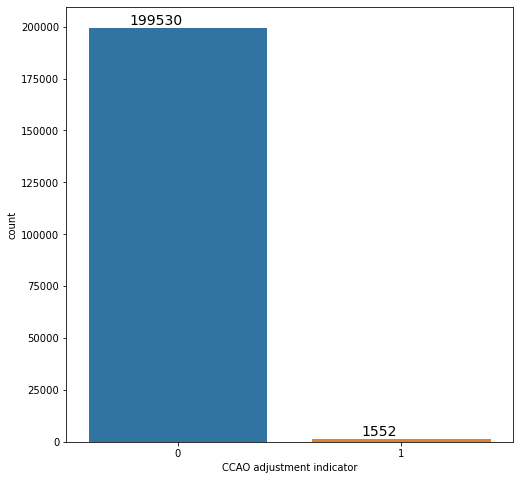

In [46]:
plt.figure(figsize=(8,8))        
g=sns.countplot(df['CCAO adjustment indicator'])
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

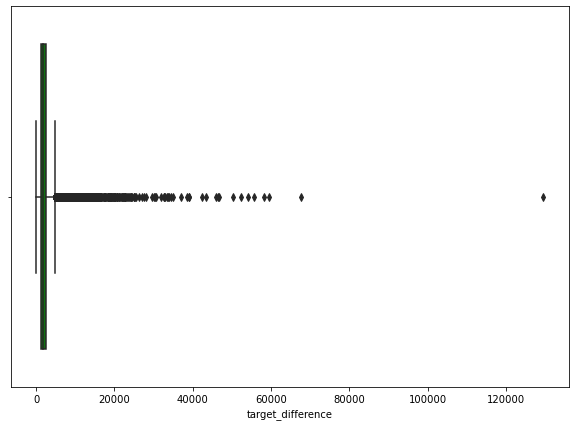

In [47]:
plt.figure(figsize=[10,7])
sns.boxplot(x=df.target_difference,orient='v',color='green')
plt.show()  

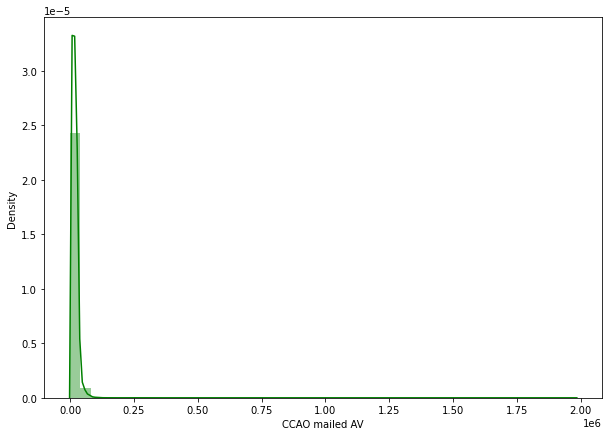

In [48]:
plt.figure(figsize=[10,7])
sns.distplot(df['CCAO mailed AV'],color='green')
plt.show()

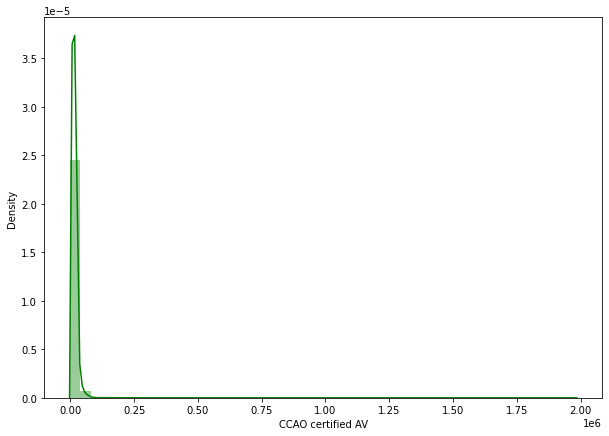

In [49]:
plt.figure(figsize=[10,7])
sns.distplot(df['CCAO certified AV'],color='green')
plt.show()

## Bivariate Analysis:

In [50]:
df_target=df[['CCAO certified AV','CCAO mailed AV','target_difference']]

<Figure size 1800x864 with 0 Axes>

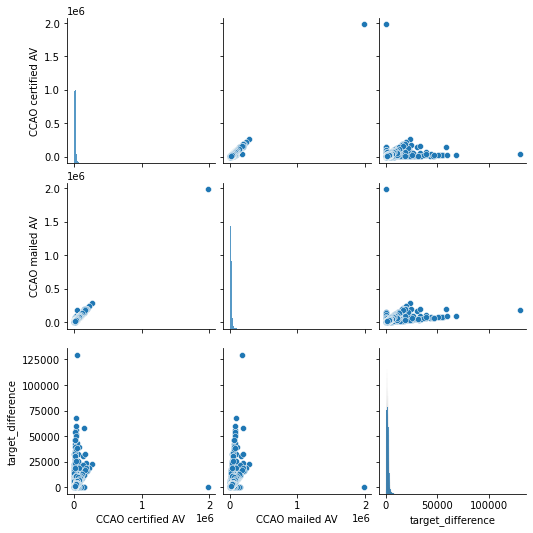

In [51]:
plt.figure(figsize=[25,12])
sns.pairplot(df_target)
plt.show()

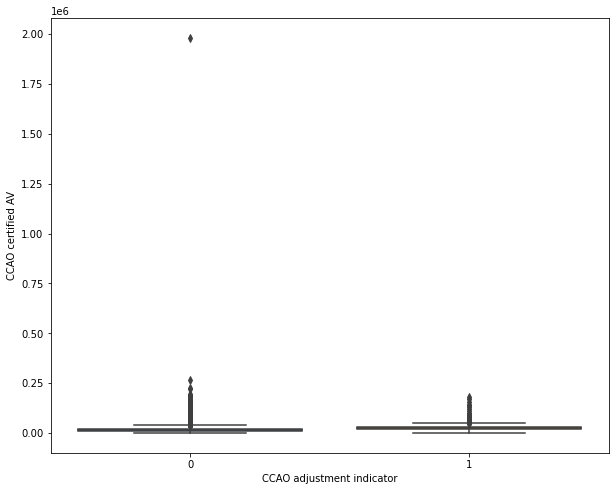

In [52]:
plt.figure(figsize=[10,8])
sns.boxplot(x='CCAO adjustment indicator',y='CCAO certified AV',data=df)
plt.show()

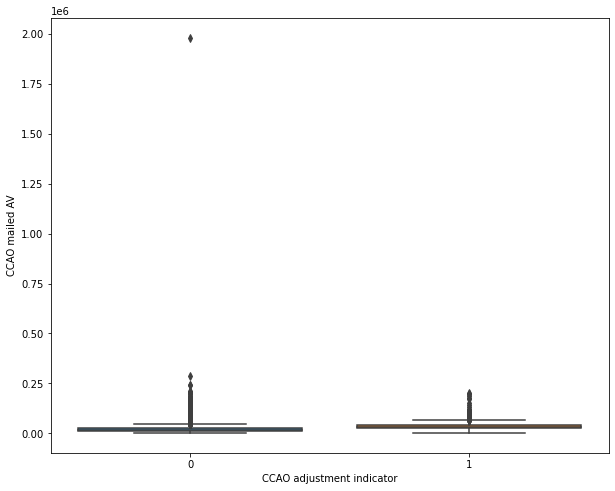

In [53]:
plt.figure(figsize=[10,8])
sns.boxplot(x='CCAO adjustment indicator',y='CCAO mailed AV',data=df)
plt.show()

## Multivariate Analysis:

### Correlation:

In [54]:
corr=pd.DataFrame((df.corrwith(df['CCAO adjustment indicator']).sort_values(ascending=False))*100).head(10)

In [55]:
corr.head()

,0
CCAO adjustment indicator,100.00
target_difference,36.40
CCAO mailed AV,11.19
Comm - Condominium,8.45
CCAO certified AV,7.82


<Figure size 2160x2160 with 0 Axes>

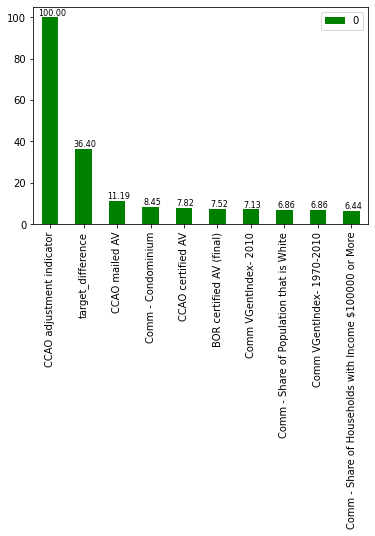

In [56]:
plt.figure(figsize=[30,30])
g=corr.plot(kind='bar',color='green')
for p in g.patches:
    g.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=8)
plt.show()

## Linear Regression:

## Scaling and  Splitting Train-test data:

In [57]:
scaler=MinMaxScaler()

In [58]:
#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [59]:
df_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
201023,53,17031530200,34,5,72,1,4,28,14,203,2,72,330,72003,6265,5701,5701,0,203,72,72330,330,3625,94,0,4,3,3,2,3,1,1,1,0,1.00,0,1170,1.00,10765,1,0,135,9,6.91,36448,74,72,5,-5,-3,-7,-9,-14,0.71,0.01,0.21,0.07,0.33,0.64,0.43,0.64,0.36,9129,0.23,0.30,0.26,0.26,0.18,9129,0.01,0.92,0.06,0.00,0.02,0.25,0.35,0.25,0.16,27028,564
149080,11,17031110400,45,12,35,5,0,19,10,203,1,71,402,71033,30081,27072,27072,0,203,71,71402,402,3720,96,2,6,3,1,2,1,1,0,1,0,2.00,0,1266,1.00,13078,1,0,267,43,6.89,69736,36,35,8,7,7,7,7,-1,0.48,0.09,0.32,0.11,0.33,0.42,0.36,0.66,0.34,10381,0.10,0.16,0.17,0.31,0.36,10381,0.62,0.01,0.25,0.10,0.03,0.20,0.36,0.28,0.16,27503,3009
47461,65,17031650400,13,11,71,3,4,22,11,202,2,72,30,72014,16893,15034,15034,0,202,72,72030,30,3750,68,2,5,3,1,1,3,1,0,1,1,2.00,2,943,1.00,12242,1,0,165,2,6.93,48634,73,71,5,7,7,1,-3,-8,0.70,0.07,0.17,0.06,0.32,0.61,0.40,0.71,0.29,9272,0.14,0.19,0.26,0.32,0.23,9272,0.13,0.03,0.84,0.00,0.00,0.28,0.40,0.21,0.10,31886,1859
57560,11,17031110501,45,10,35,5,0,19,10,203,1,71,10,71033,31486,28337,28337,0,203,71,71010,10,3090,79,2,7,4,1,2,3,1,0,1,1,2.00,0,1440,1.50,12932,1,0,109,43,6.89,86512,36,35,8,7,7,7,7,-1,0.48,0.09,0.32,0.11,0.33,0.42,0.36,0.66,0.34,10381,0.10,0.16,0.17,0.31,0.36,10381,0.62,0.01,0.25,0.10,0.03,0.20,0.36,0.28,0.16,27503,3149
185374,10,17031100200,41,9,53,5,0,20,10,203,1,71,410,71001,36249,32624,32624,0,203,71,71410,410,3750,94,2,7,4,1,2,3,0,2,1,1,1.00,0,1432,1.50,13835,1,0,241,43,6.89,74201,55,53,9,9,9,8,7,-2,0.72,0.08,0.11,0.09,0.24,0.46,0.29,0.74,0.26,15020,0.07,0.15,0.14,0.29,0.42,15020,0.77,0.01,0.15,0.04,0.03,0.20,0.33,0.28,0.19,37924,3625


In [60]:
col=list(df_train.columns)
l1=['CCAO adjustment indicator','Central Air Conditioning','Flood Risk Factor','Flood Risk Direction']
col = [ele for ele in col if ele not in l1]

In [61]:
df_train[col]=scaler.fit_transform(df_train[col])

In [62]:
df_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
201023,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.35,0.34,0.00,0.29,0.29,0.54,0.28,0.00,0.00,0.00,0,0.50,0.29,0.32,0.54,0.02,0.46,0.00,0.18,0.30,1.00,1.00,1.00,1,0.50,0.20,0.00,0.25,0.00,0.14,0.00,0.37,1,0,0.39,0.20,0.07,0.16,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25,0.00
149080,0.13,0.12,0.90,0.73,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.66,0.14,0.01,0.01,0.01,0,0.50,0.14,0.19,0.66,0.02,0.47,0.67,0.27,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.15,0.00,0.45,1,0,0.77,0.93,0.06,0.35,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26,0.02
47461,0.84,0.77,0.24,0.67,0.95,0.25,0.57,0.27,0.26,0.00,0.29,0.29,0.03,0.28,0.01,0.01,0.01,0,0.00,0.29,0.28,0.03,0.02,0.33,0.67,0.23,0.30,0.33,0.50,1.00,1,0.00,0.20,0.12,0.50,0.67,0.11,0.00,0.42,1,0,0.48,0.04,0.08,0.23,0.95,0.95,0.73,0.82,0.82,0.55,0.33,0.21,0.81,0.11,0.23,0.06,0.45,0.67,0.48,0.77,0.23,0.15,0.20,0.20,0.72,0.86,0.33,0.15,0.15,0.02,0.92,0.01,0.06,0.62,0.33,0.39,0.25,0.30,0.01
57560,0.13,0.12,0.90,0.60,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.00,0.14,0.02,0.01,0.01,0,0.50,0.14,0.14,0.00,0.02,0.38,0.67,0.32,0.40,0.33,1.00,1.00,1,0.00,0.20,0.12,0.50,0.00,0.17,0.25,0.44,1,0,0.32,0.93,0.06,0.45,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26,0.02
185374,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0.02,0.02,0,0.50,0.14,0.20,0.68,0.02,0.46,0.67,0.32,0.40,0.33,1.00,1.00,0,1.00,0.20,0.12,0.25,0.00,0.17,0.25,0.47,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36,0.03


In [63]:
# We are not supposed to fit the test dataset because model can learn from it and it can affect the model result.
# So we only transform the test data set based on train set fit..
df_test[col]=scaler.transform(df_test[col])

In [64]:
df_test.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
6621,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0.02,0.02,0,0.50,0.14,0.20,0.68,0.05,0.47,0.67,0.36,0.50,0.33,1.00,0.33,1,0.00,0.40,0.12,0.50,0.00,0.15,0.00,0.48,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36,0.03
52326,0.87,0.79,0.33,0.07,0.92,0.00,0.57,0.39,0.39,0.00,0.29,0.29,0.27,0.28,0.00,0.00,0.00,0,0.50,0.29,0.30,0.27,0.02,0.53,0.00,0.23,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.13,0.00,0.60,1,0,0.97,0.30,0.06,0.25,0.92,0.92,0.18,0.18,0.18,0.18,0.08,0.36,0.54,0.00,0.58,0.13,0.48,0.80,0.74,0.45,0.55,0.15,0.59,0.71,0.75,0.42,0.05,0.15,0.01,0.91,0.10,0.00,0.25,0.46,0.10,0.61,0.70,0.24,0.01
162864,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.34,0.34,0.00,0.29,0.29,0.57,0.31,0.00,0.00,0.00,0,0.00,0.29,0.33,0.57,0.03,0.31,0.67,0.23,0.20,1.00,1.00,1.00,1,0.00,0.20,0.00,0.00,0.00,0.10,0.00,0.76,1,0,0.98,0.20,0.07,0.29,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25,0.01
140761,0.63,0.58,0.16,0.27,0.80,0.12,0.43,0.35,0.34,0.00,0.00,0.00,0.36,0.00,0.01,0.01,0.01,0,0.50,0.00,0.03,0.36,0.02,0.29,0.67,0.27,0.30,0.33,1.00,1.00,0,0.50,0.20,0.00,0.50,0.00,0.14,0.00,0.35,1,0,0.22,0.13,0.07,0.21,0.80,0.80,0.45,0.36,0.36,0.18,0.08,0.21,0.72,0.00,0.30,0.20,0.52,0.65,0.61,0.55,0.45,0.23,0.40,0.45,0.69,0.70,0.19,0.23,0.01,0.99,0.01,0.01,0.35,0.45,0.14,0.69,0.60,0.37,0.01
131260,0.88,0.80,0.10,0.07,0.31,0.00,0.57,0.40,0.39,0.00,0.29,0.29,0.27,0.30,0.00,0.00,0.00,0,0.00,0.29,0.30,0.27,0.02,0.62,0.00,0.23,0.20,0.33,0.50,1.00,1,0.50,0.20,0.12,0.50,0.00,0.09,0.00,0.25,5,0,0.45,0.78,0.06,0.10,0.30,0.31,0.09,0.09,0.09,0.00,0.00,0.36,0.20,0.00,0.68,0.45,0.75,0.73,0.90,0.20,0.80,0.14,0.76,0.86,0.68,0.32,0.00,0.14,0.00,0.98,0.04,0.00,0.15,0.57,0.17,0.59,0.43,0.21,0.01


In [65]:
X_train = df_train.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_train = df_train.target_difference
X_test = df_test.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_test = df_test.target_difference   

In [66]:
X_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
201023,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.35,0.34,0.00,0.29,0.29,0.54,0.28,0.00,0,0.50,0.29,0.32,0.54,0.02,0.46,0.00,0.18,0.30,1.00,1.00,1.00,1,0.50,0.20,0.00,0.25,0.00,0.14,0.00,0.37,1,0,0.39,0.20,0.07,0.16,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25
149080,0.13,0.12,0.90,0.73,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.66,0.14,0.01,0,0.50,0.14,0.19,0.66,0.02,0.47,0.67,0.27,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.15,0.00,0.45,1,0,0.77,0.93,0.06,0.35,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
47461,0.84,0.77,0.24,0.67,0.95,0.25,0.57,0.27,0.26,0.00,0.29,0.29,0.03,0.28,0.01,0,0.00,0.29,0.28,0.03,0.02,0.33,0.67,0.23,0.30,0.33,0.50,1.00,1,0.00,0.20,0.12,0.50,0.67,0.11,0.00,0.42,1,0,0.48,0.04,0.08,0.23,0.95,0.95,0.73,0.82,0.82,0.55,0.33,0.21,0.81,0.11,0.23,0.06,0.45,0.67,0.48,0.77,0.23,0.15,0.20,0.20,0.72,0.86,0.33,0.15,0.15,0.02,0.92,0.01,0.06,0.62,0.33,0.39,0.25,0.30
57560,0.13,0.12,0.90,0.60,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.00,0.14,0.01,0,0.50,0.14,0.14,0.00,0.02,0.38,0.67,0.32,0.40,0.33,1.00,1.00,1,0.00,0.20,0.12,0.50,0.00,0.17,0.25,0.44,1,0,0.32,0.93,0.06,0.45,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
185374,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0,0.50,0.14,0.20,0.68,0.02,0.46,0.67,0.32,0.40,0.33,1.00,1.00,0,1.00,0.20,0.12,0.25,0.00,0.17,0.25,0.47,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36


In [67]:
y_train.head()

201023   0.00
149080   0.02
47461    0.01
57560    0.02
185374   0.03
Name: target_difference, dtype: float64

In [68]:
X_test.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
6621,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0,0.50,0.14,0.20,0.68,0.05,0.47,0.67,0.36,0.50,0.33,1.00,0.33,1,0.00,0.40,0.12,0.50,0.00,0.15,0.00,0.48,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36
52326,0.87,0.79,0.33,0.07,0.92,0.00,0.57,0.39,0.39,0.00,0.29,0.29,0.27,0.28,0.00,0,0.50,0.29,0.30,0.27,0.02,0.53,0.00,0.23,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.13,0.00,0.60,1,0,0.97,0.30,0.06,0.25,0.92,0.92,0.18,0.18,0.18,0.18,0.08,0.36,0.54,0.00,0.58,0.13,0.48,0.80,0.74,0.45,0.55,0.15,0.59,0.71,0.75,0.42,0.05,0.15,0.01,0.91,0.10,0.00,0.25,0.46,0.10,0.61,0.70,0.24
162864,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.34,0.34,0.00,0.29,0.29,0.57,0.31,0.00,0,0.00,0.29,0.33,0.57,0.03,0.31,0.67,0.23,0.20,1.00,1.00,1.00,1,0.00,0.20,0.00,0.00,0.00,0.10,0.00,0.76,1,0,0.98,0.20,0.07,0.29,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25
140761,0.63,0.58,0.16,0.27,0.80,0.12,0.43,0.35,0.34,0.00,0.00,0.00,0.36,0.00,0.01,0,0.50,0.00,0.03,0.36,0.02,0.29,0.67,0.27,0.30,0.33,1.00,1.00,0,0.50,0.20,0.00,0.50,0.00,0.14,0.00,0.35,1,0,0.22,0.13,0.07,0.21,0.80,0.80,0.45,0.36,0.36,0.18,0.08,0.21,0.72,0.00,0.30,0.20,0.52,0.65,0.61,0.55,0.45,0.23,0.40,0.45,0.69,0.70,0.19,0.23,0.01,0.99,0.01,0.01,0.35,0.45,0.14,0.69,0.60,0.37
131260,0.88,0.80,0.10,0.07,0.31,0.00,0.57,0.40,0.39,0.00,0.29,0.29,0.27,0.30,0.00,0,0.00,0.29,0.30,0.27,0.02,0.62,0.00,0.23,0.20,0.33,0.50,1.00,1,0.50,0.20,0.12,0.50,0.00,0.09,0.00,0.25,5,0,0.45,0.78,0.06,0.10,0.30,0.31,0.09,0.09,0.09,0.00,0.00,0.36,0.20,0.00,0.68,0.45,0.75,0.73,0.90,0.20,0.80,0.14,0.76,0.86,0.68,0.32,0.00,0.14,0.00,0.98,0.04,0.00,0.15,0.57,0.17,0.59,0.43,0.21


In [69]:
y_test.head()

6621     0.03
52326    0.01
162864   0.01
140761   0.01
131260   0.01
Name: target_difference, dtype: float64

### Normal Linear Regression (with out tuning and feature selection):

In [70]:
X_train_sm=sm.add_constant(X_train)

In [71]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [72]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_difference   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4726.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:48:05   Log-Likelihood:             5.2716e+05
No. Observations:              140757   AIC:                        -1.054e+06
Df Residuals:                  140686   BIC:                        -1.053e+06
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.5118      0.053     -9.594      0.000      -0.616      -0.407
area_num_1                                                    -0.0024      0.000    -13.587      0.000      -0.003      -0.002
censustrac                                                    -0.0003      0.000     -3.050      0.002      -0.001      -0.000
chicagowar                                                    -0.0009      0.000     -6.033      0.000      -0.001      -0.001
commission                                                     0.0018      0.000     15.914      0.000       0.002       0.002
community                                                      0.5989      0.040     14.925      0.000       0.520       0.678
congressio                                                    -0.0004      0.000     -3.326      0.001      -0.001      -0.000
politicalt                                                    -0.0020      0.000     -9.705      0.000      -0.002      -0.002
staterepre                                                     0.0024      0.003      0.771      0.441      -0.004       0.009
statesenat                                                    -0.0021      0.003     -0.655      0.512      -0.008       0.004
Class                                                         -0.0026      0.001     -2.509      0.012      -0.005      -0.001
Township name                                                  0.0059      0.001      7.849      0.000       0.004       0.007
Township                                                       0.0059      0.001      7.849      0.000       0.004       0.007
CCAO Neighborhood                                             -0.0008   6.75e-05    -11.450      0.000      -0.001      -0.001
Tax code                                                      -0.0238      0.003     -7.881      0.000      -0.030      -0.018
BOR certified AV (final)                                       0.6456      0.005    124.251      0.000       0.635       0.656
CCAO adjustment indicator                                      0.0350      0.000    201.017      0.000       0.035       0.035
Property Class                                                -0.0003   9.61e-05     -2.672      0.008      -0.000   -6.84e-05
Township Code2                                                 0.0059      0.001      7.849      0.000       0.004       0.007
Neighborhood Code                                              0.0057      0.001      7.786      0.000       0.004       0.007
Township Neighborhood Only                                    -0.0008   6.75e-05    -11.450      0.000      -0.001      -0.001
Land Square Feet                   

In [73]:
#we got 70% adjusted r-squared value but there are multiple variables with high p values indicating that they are insignificant.

In [74]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X_train.columns),2))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 3, 5, 7, 9, 11, 13, 15,
                                                   17, 19, 21, 23, 25, 27, 29,
                                                   31, 33, 35, 37, 39, 41, 43,
                                                   45, 47, 49, 51, 53, 55, 57,
                                                   59, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
# converting the gridsearchCV results into a dataframe.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.88,1.01,0.03,0.01,1,{'n_features_to_select': 1},0.01,0.00,0.01,0.01,0.01,0.01,0.00,38,0.01,0.01,0.01,0.01,0.01,0.01,0.00
1,15.61,0.83,0.03,0.01,3,{'n_features_to_select': 3},0.03,0.03,0.04,0.02,0.03,0.03,0.01,37,0.03,0.03,0.03,0.02,0.03,0.03,0.01
2,16.23,2.10,0.03,0.01,5,{'n_features_to_select': 5},0.04,0.38,0.38,0.03,0.03,0.17,0.17,36,0.04,0.37,0.36,0.03,0.04,0.17,0.16
3,16.27,2.61,0.03,0.01,7,{'n_features_to_select': 7},0.05,0.40,0.40,0.47,0.05,0.28,0.19,35,0.05,0.38,0.38,0.42,0.06,0.26,0.17
4,13.27,0.83,0.02,0.01,9,{'n_features_to_select': 9},0.43,0.40,0.40,0.48,0.36,0.41,0.04,34,0.42,0.38,0.38,0.42,0.44,0.41,0.02


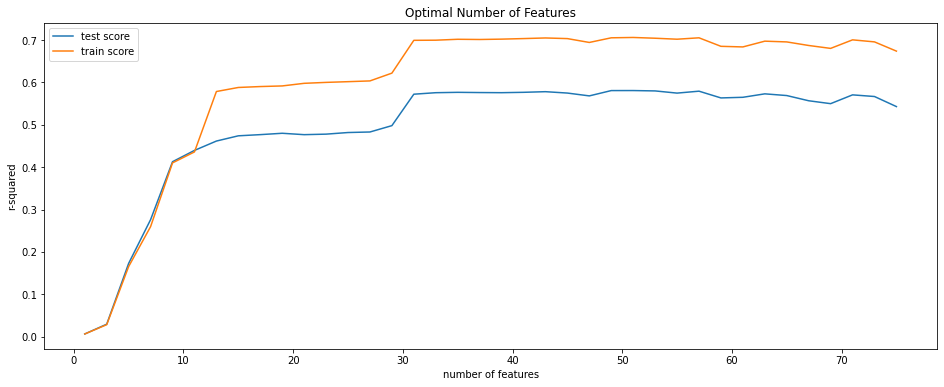

In [76]:
# plotting cv results tofind the best number of features to be used in the model.
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [77]:
rfe=RFE(LinearRegression(),n_features_to_select=33)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=33)

In [78]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False])

In [79]:
col=X_train.columns[rfe.support_]
col

Index(['community', 'Township name', 'Township', 'CCAO Neighborhood',
       'BOR certified AV (final)', 'CCAO adjustment indicator',
       'Township Code2', 'Neighborhood Code', 'Township Neighborhood Only',
       'Land Square Feet', 'Building Square Feet', 'CommsortIndex',
       'Community Area', 'Comm VGentIndex- 1970', 'Comm VGentIndex- 2010',
       'Comm VGentIndex- 1970-2010', 'Comm - Single Family',
       'Comm - Condominium', 'Comm - Building with 2-4 Units',
       'Comm - Building with 5+ Units',
       'Comm - Share of Households that are Owner-Occupied',
       'Comm - Share of Households that are Renter-Occupied',
       'Comm - Total Households',
       'Comm - Share of Population that is under the Poverty Level',
       'Comm - Share of Households with Income Less than $25000',
       'Comm - Share of Households with Income $25000 to $50000',
       'Comm - Share of Households with Income $50000 to $100000',
       'Comm - Share of Households with Income $100000 or 

In [80]:
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]

In [81]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [82]:
lm = sm.OLS(y_train,X_train_rfe).fit()      # fitting the model on train set....

In [83]:
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:      target_difference   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:09:22   Log-Likelihood:             5.2506e+05
No. Observations:              140757   AIC:                        -1.050e+06
Df Residuals:                  140730   BIC:                        -1.050e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# Residual Analysis:

In [84]:
y_train_pred = lm.predict(X_train_rfe)  # predicting y_train values using the model..

Text(0.5, 0, 'Errors')

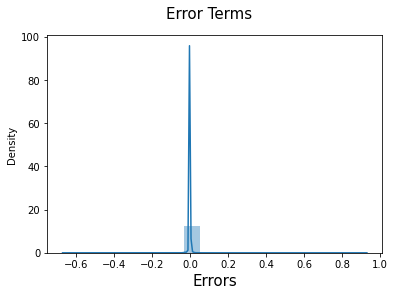

In [85]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)       # comparing them with original value....
fig.suptitle('Error Terms', fontsize = 15)              # Plot heading 
plt.xlabel('Errors', fontsize = 15) 

# Model evaluation(on test set):

In [86]:
X_test_rfe = X_test[X_train_rfe.columns[1:]]

In [87]:
X_test_rfe.shape

(60325, 33)

In [88]:
X_test_rfe=sm.add_constant(X_test_rfe)

In [89]:
y_test_pred = lm.predict(X_test_rfe)

In [90]:
lm = sm.OLS(y_test,X_test_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      target_difference   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     8488.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:09:24   Log-Likelihood:             2.3700e+05
No. Observations:               60325   AIC:                        -4.739e+05
Df Residuals:                   60298   BIC:                        -4.737e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [91]:
# We have achieved 78.5% adjusted r2 on the test data set but two variables have higher p-values.

### Dropping variables with high p values:

In [92]:
# drop variables with high p values.
X_test_rfe.drop(['CommsortIndex','Land Square Feet'],axis=1,inplace=True)
#X_train_rfe=sm.add_constant(X_train)
lm = sm.OLS(y_test,X_test_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_difference   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     9195.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:09:24   Log-Likelihood:             2.3700e+05
No. Observations:               60325   AIC:                        -4.739e+05
Df Residuals:                   60300   BIC:                        -4.737e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.8505      0.043    -19.749      0.000      -0.935      -0.766
community                                                      0.1187      0.034      3.506      0.000       0.052       0.185
Township name                                                 -0.0005   2.58e-05    -17.486      0.000      -0.001      -0.000
Township                                                      -0.0005   2.58e-05    -17.486      0.000      -0.001      -0.000
CCAO Neighborhood                                             -0.0008   6.27e-05    -12.585      0.000      -0.001      -0.001
BOR certified AV (final)                                       1.3964      0.008    178.525      0.000       1.381       1.412
CCAO adjustment indicator                                      0.0357      0.000    157.732      0.000       0.035       0.036
Township Code2                                                -0.0005   2.58e-05    -17.486      0.000      -0.001      -0.000
Neighborhood Code                                             -0.0005   2.55e-05    -19.865      0.000      -0.001      -0.000
Township Neighborhood Only                                    -0.0008   6.27e-05    -12.585      0.000      -0.001      -0.001
Building Square Feet                                           0.0070      0.001     12.083      0.000       0.006       0.008
Community Area                                                -0.1186      0.034     -3.503      0.000      -0.185      -0.052
Comm VGentIndex- 1970                                         -0.1162      0.006    -19.605      0.000      -0.128      -0.105
Comm VGentIndex- 2010                                          0.1279      0.006     20.021      0.000       0.115       0.140
Comm VGentIndex- 1970-2010                                    -0.2047      0.010    -19.684      0.000      -0.225      -0.184
Comm - Single Family                                           0.4486      0.036     12.554      0.000       0.379       0.519
Comm - Condominium                                             0.3532      0.028     12.726      0.000       0.299       0.408
Comm - Building with 2-4 Units                                 0.3791      0.030     12.707      0.000       0.321       0.438
Comm - Building with 5+ Units                                  0.3592      0.028     12.609      0.000       0.303       0.415
Comm - Share of Households that are Owner-Occupied            -0.4220      0.021    -19.630      0.000      -0.464      -0.380
Comm - Share of Households that are Renter-Occupied           -0.4284      0.022    -19.864      0.000      -0.471      -0.386
Comm - Total Households            

In [93]:
# Now we have our final model with 31 significant variables and 78.5% adjusted r2 score.

Text(0, 0.5, 'y_pred')

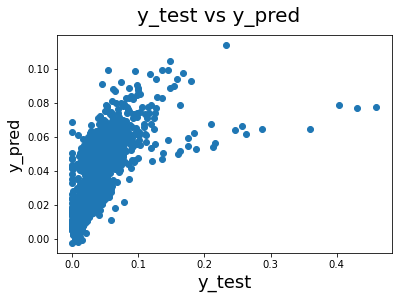

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# Logistic Regression:

In [95]:
df_train.shape

(140757, 80)

In [96]:
df_test.shape

(60325, 80)

In [97]:
X_train = df_train.drop(['CCAO adjustment indicator'],axis=1)
y_train = df_train['CCAO adjustment indicator']
X_test = df_test.drop(['CCAO adjustment indicator'],axis=1)
y_test = df_test['CCAO adjustment indicator']   

## Normal logistic regression with out tuning and feature selection

In [98]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                     
=====================================================================================
Dep. Variable:     CCAO adjustment indicator   No. Observations:               140757
Model:                                   GLM   Df Residuals:                   140685
Model Family:                       Binomial   Df Model:                           71
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                    nan
Date:                       Mon, 03 Apr 2023   Deviance:                       3213.5
Time:                               12:09:54   Pearson chi2:                 3.12e+15
No. Iterations:                          100   Pseudo R-squ. (CS):                nan
Covariance Type:                   nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -695.2998    264.949     -2.624      0.009   -1214.590    -176.010
area_num_1                                                    -1.3689      0.668     -2.050      0.040      -2.678      -0.060
censustrac                                                     0.5088      0.398      1.278      0.201      -0.271       1.289
chicagowar                                                     0.8744      0.644      1.358      0.175      -0.388       2.137
commission                                                     0.6708      0.508      1.321      0.186      -0.324       1.666
community                                                   -120.1830    189.718     -0.633      0.526    -492.023     251.657
congressio                                                     0.0533      0.516      0.103      0.918      -0.958       1.064
politicalt                                                     1.2959      0.836      1.550      0.121      -0.343       2.935
staterepre                                                   -24.0632     14.649     -1.643      0.100     -52.776       4.649
statesenat                                                    23.3248     14.678      1.589      0.112      -5.444      52.093
Class                                                        -26.7751      2.513    -10.654      0.000     -31.701     -21.849
Township name                                                  7.7557      3.580      2.166      0.030       0.739      14.773
Township                                                       7.7557      3.580      2.166      0.030       0.739      14.773
CCAO Neighborhood                                              0.2941      0.270      1.091      0.275      -0.234       0.822
Tax code                                                     -31.2808     14.440     -2.166      0.030     -59.582      -2.980
CCAO mailed AV                                              -238.3998     26.938     -8.850      0.000    -291.196    -185.603
CCAO certified AV                                           -280.6939     27.362    -10.258      0.000    -334.323    -227.065
BOR certified AV (final)                                    -708.0864     56.580    -12.515      0.000    -818.982    -597.191
Property Class                                                 1.0453      0.396      2.639      0.008       0.269       1.822
Township Code2                                                 7.7557      3.580      2.166      0.030       0.739      14.773
Neighborhood Code                                              7.6067      3.485     

In [99]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.head()          # Fitting y_train values to the model and finding out the probability of conversion..

,Converted,Converted_Prob,Index
0,0,0.00,201023
1,0,0.00,149080
2,0,0.00,47461
3,0,0.00,57560
4,0,0.00,185374


In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()   

,Converted,Converted_Prob,Index,predicted
0,0,0.00,201023,0
1,0,0.00,149080,0
2,0,0.00,47461,0
3,0,0.00,57560,0
4,0,0.00,185374,0


In [101]:
print(accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))      # Accuracy of the model. 

0.997726578429492


In [102]:
# Confusion matrix represents True Negatives, False Positives ,False Negatives , True positives in matrix form.
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[139601,     56],
       [   264,    836]], dtype=int64)

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
Sensitivity=TP / float(TP+FN)
Sensitivity

0.76

In [105]:
# Let us calculate specificity
Specificity=TN / float(TN+FP)
Specificity

0.9995990175931031

In [106]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
FPR=print(FP/ float(TN+FP))
FPR

0.0004009824068968974


In [107]:
# positive predictive value 
ppv=TP / float(TP+FP)
ppv

0.9372197309417041

In [108]:
# Negative predictive value
npv=TN / float(TN+ FN)
npv

0.9981124655918207

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

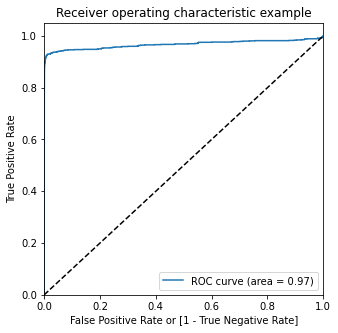

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [111]:
# we have a model with good accuracy (99%) and auc score (97%). We need to drop insignificant variables now.

#### Now instead of removing features one by one manually we can use RFECV to create a optimized model.

In [112]:
logreg=LogisticRegression()       # creating a logistic regression model

In [113]:
# We can use RFE for feature selection and also for optimal number of features we can use rfecv.
rfecv = RFECV(estimator=logreg, step=1, cv=4, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=4, estimator=LogisticRegression(), scoring='accuracy')

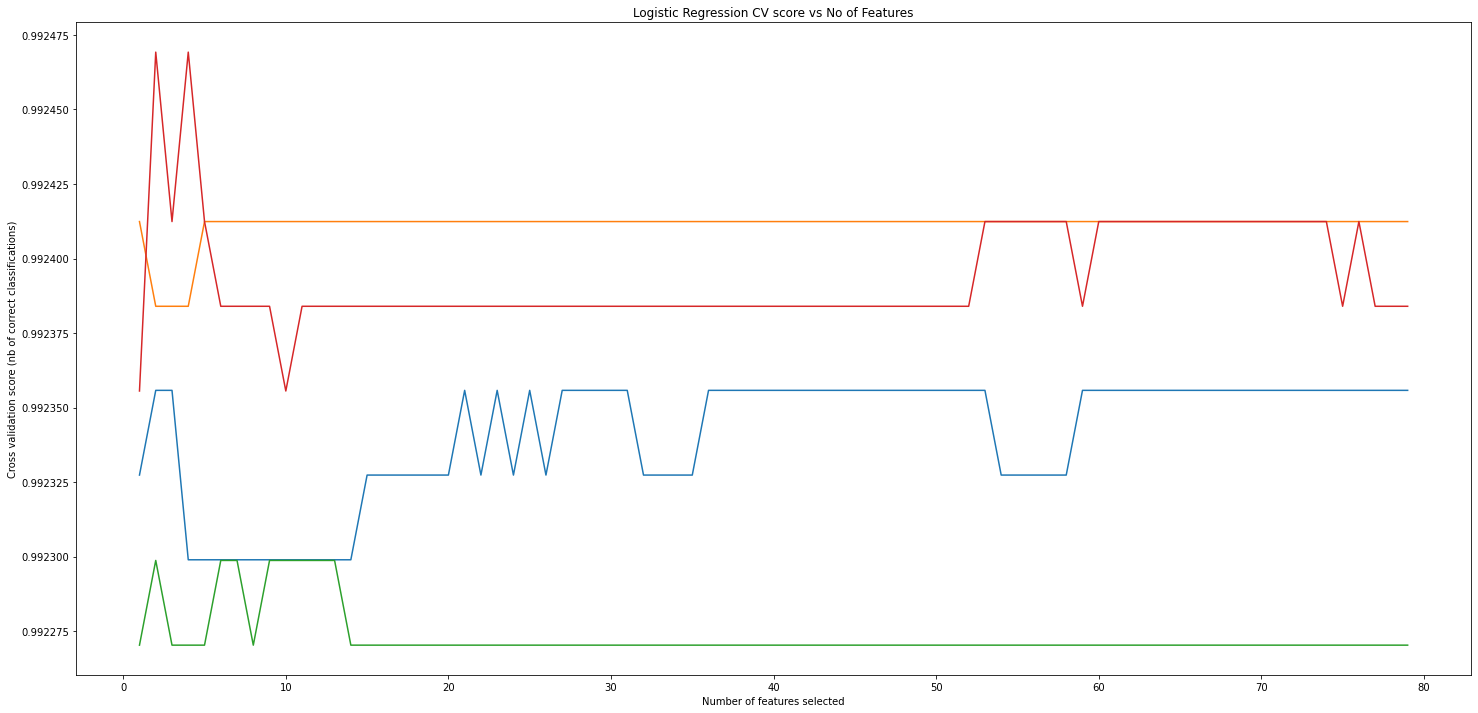

In [114]:
# plotting no.of features vs Cross validation score
plt.figure(figsize=[25,12])      
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [115]:
#### From the above plot we can see thatnumber of optimal features is 7.

In [116]:
rfe=RFE(LogisticRegression(),n_features_to_select=7)        # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [117]:
rfe.support_            # support of all x frame columns.

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [118]:
col = X_train.columns[rfe.support_]  # seperating the rfe supported columns.

In [119]:
# Final Logistic regression model with rfe
X_train_sm = sm.add_constant(X_train[col])
log = sm.GLM(y_train.values.reshape(-1,1),X_train_sm, family = sm.families.Binomial())
res = log.fit()

In [120]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               140757
Model:                            GLM   Df Residuals:                   140749
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 Apr 2023   Deviance:                       3785.3
Time:                        12:18:44   Pearson chi2:                 1.35e+15
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -4.3528      0.402    -10.838      0.000      -5.140      -3.566
Class                                             -44.9433     10.448     -4.302      0.000     -65.420     -24.466
CCAO mailed AV                                  -1017.3780     30.437    -33.425      0.000   -1077.034    -957.722
Full Baths                                          1.9903      0.593      3.358      0.001       0.829       3.152
Half Baths                                          5.3282      0.804      6.628      0.000       3.753       6.904
Comm -  Cost-Burdened Renter-Occupied Household    -4.0731      0.402    -10.131      0.000      -4.861      -3.285
Comm - Share of Population Aged under 18           -1.9615      0.594     -3.301      0.001      -3.126      -0.797
target_difference                                 624.5130     14.959     41.747      0.000     595.193     653.833
===================================================================================================================
"""

In [121]:
#### we can see that all the features have acceptable p-values.

In [122]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

201023   0.00
149080   0.00
47461    0.00
57560    0.00
185374   0.00
116640   0.00
143174   0.00
75610    0.00
43283    0.00
88479    0.00
dtype: float64

In [123]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.head()          # converting the above results as a dataframe.

,Churn,Churn_Prob,Index
201023,0,0.00,201023
149080,0,0.00,149080
47461,0,0.00,47461
57560,0,0.00,57560
185374,0,0.00,185374


In [124]:
#### Now we need to find the optimal percentage of churn_probability to classify customers as churn or not.

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Index,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
201023,0,0.00,201023,1,0,0,0,0,0,0,0,0,0
149080,0,0.00,149080,1,0,0,0,0,0,0,0,0,0
47461,0,0.00,47461,1,0,0,0,0,0,0,0,0,0
57560,0,0.00,57560,1,0,0,0,0,0,0,0,0,0
185374,0,0.00,185374,1,0,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.01   1.00   0.00
0.10  0.10      1.00   0.82   1.00
0.20  0.20      1.00   0.78   1.00
0.30  0.30      1.00   0.76   1.00
0.40  0.40      1.00   0.73   1.00
0.50  0.50      1.00   0.71   1.00
0.60  0.60      1.00   0.68   1.00
0.70  0.70      1.00   0.66   1.00
0.80  0.80      1.00   0.64   1.00
0.90  0.90      1.00   0.60   1.00


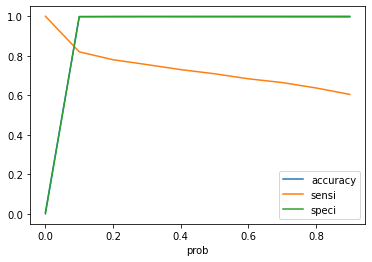

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [128]:
y_train_pred_final.drop(numbers,axis=1,inplace=True)
y_train_pred_final['Predicted']= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()         # Converting the results with optimal probability as a dataframe.

,Churn,Churn_Prob,Index,Predicted
201023,0,0.00,201023,0
149080,0,0.00,149080,0
47461,0,0.00,47461,0
57560,0,0.00,57560,0
185374,0,0.00,185374,0


In [129]:
# Accuracy

accuracy=metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)
accuracy

0.997286103000206

In [130]:
# Now we build confusion matrix to try out more metrics
conf_mat = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
conf_mat

array([[139473,    184],
       [   198,    902]], dtype=int64)

In [131]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model.
sensitivity=TP / float(TP+FN)
sensitivity

0.82

In [133]:
# Let us calculate specificity.
specificity=TN / float(TN+FP)
specificity

0.9986824863773388

In [134]:
# Let us calculate precision.
precision= TP/float(TP+FP)
precision

0.8305709023941068

In [135]:
def draw_roc( actual, probs ):             # custom function for plotting a ROC Curve.
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

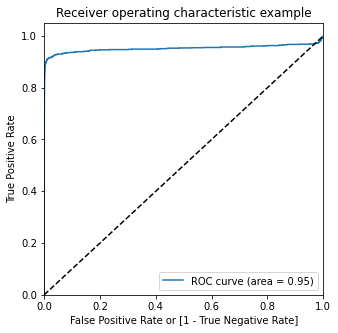

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)      # ROC Curve for train dataset.

### Making predictions on test set:

In [137]:
X_test.head()      # checking X_test_pca 

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
6621,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0.02,0.02,0.50,0.14,0.20,0.68,0.05,0.47,0.67,0.36,0.50,0.33,1.00,0.33,1,0.00,0.40,0.12,0.50,0.00,0.15,0.00,0.48,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36,0.03
52326,0.87,0.79,0.33,0.07,0.92,0.00,0.57,0.39,0.39,0.00,0.29,0.29,0.27,0.28,0.00,0.00,0.00,0.50,0.29,0.30,0.27,0.02,0.53,0.00,0.23,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.13,0.00,0.60,1,0,0.97,0.30,0.06,0.25,0.92,0.92,0.18,0.18,0.18,0.18,0.08,0.36,0.54,0.00,0.58,0.13,0.48,0.80,0.74,0.45,0.55,0.15,0.59,0.71,0.75,0.42,0.05,0.15,0.01,0.91,0.10,0.00,0.25,0.46,0.10,0.61,0.70,0.24,0.01
162864,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.34,0.34,0.00,0.29,0.29,0.57,0.31,0.00,0.00,0.00,0.00,0.29,0.33,0.57,0.03,0.31,0.67,0.23,0.20,1.00,1.00,1.00,1,0.00,0.20,0.00,0.00,0.00,0.10,0.00,0.76,1,0,0.98,0.20,0.07,0.29,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25,0.01
140761,0.63,0.58,0.16,0.27,0.80,0.12,0.43,0.35,0.34,0.00,0.00,0.00,0.36,0.00,0.01,0.01,0.01,0.50,0.00,0.03,0.36,0.02,0.29,0.67,0.27,0.30,0.33,1.00,1.00,0,0.50,0.20,0.00,0.50,0.00,0.14,0.00,0.35,1,0,0.22,0.13,0.07,0.21,0.80,0.80,0.45,0.36,0.36,0.18,0.08,0.21,0.72,0.00,0.30,0.20,0.52,0.65,0.61,0.55,0.45,0.23,0.40,0.45,0.69,0.70,0.19,0.23,0.01,0.99,0.01,0.01,0.35,0.45,0.14,0.69,0.60,0.37,0.01
131260,0.88,0.80,0.10,0.07,0.31,0.00,0.57,0.40,0.39,0.00,0.29,0.29,0.27,0.30,0.00,0.00,0.00,0.00,0.29,0.30,0.27,0.02,0.62,0.00,0.23,0.20,0.33,0.50,1.00,1,0.50,0.20,0.12,0.50,0.00,0.09,0.00,0.25,5,0,0.45,0.78,0.06,0.10,0.30,0.31,0.09,0.09,0.09,0.00,0.00,0.36,0.20,0.00,0.68,0.45,0.75,0.73,0.90,0.20,0.80,0.14,0.76,0.86,0.68,0.32,0.00,0.14,0.00,0.98,0.04,0.00,0.15,0.57,0.17,0.59,0.43,0.21,0.01


In [138]:
X_test_sm = sm.add_constant(X_test[col])   # seperating rfe supported columns like in X_train_sm_pca.

In [139]:
y_test_pred = res.predict(X_test_sm)   # fitting the test data set to the model.

In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_1 = pd.DataFrame(y_test_pred)


# Putting CustID to index
y_test_df['Index'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final[['Index','CCAO adjustment indicator','Churn_Prob']]

y_pred_final.head()

,Index,CCAO adjustment indicator,Churn_Prob
0,6621,0,0.00
1,52326,0,0.00
2,162864,0,0.00
3,140761,0,0.00
4,131260,0,0.00


In [141]:
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# mapping predicted values using optimal probability found in train data.

In [142]:
y_pred_final.head()

,Index,CCAO adjustment indicator,Churn_Prob,Predicted
0,6621,0,0.00,0
1,52326,0,0.00,0
2,162864,0,0.00,0
3,140761,0,0.00,0
4,131260,0,0.00,0


### Evaluation metrics:

In [143]:
# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_pred_final['CCAO adjustment indicator'], y_pred_final.Predicted)
accuracy

0.997579776212184

In [144]:
conf_mat = metrics.confusion_matrix(y_pred_final['CCAO adjustment indicator'], y_pred_final.Predicted )
conf_mat                # Confusion matrix

array([[59798,    75],
       [   71,   381]], dtype=int64)

In [145]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.8429203539823009

In [147]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.9987473485544403

In [148]:
# Let us calculate precision.
precision= TP/float(TP+FP)
precision

0.8355263157894737

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['CCAO adjustment indicator'], y_pred_final.Churn_Prob, drop_intermediate = False )

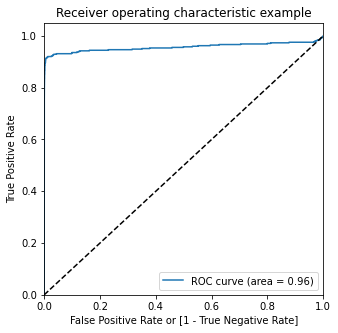

In [150]:
draw_roc(y_pred_final['CCAO adjustment indicator'], y_pred_final.Churn_Prob)     # ROC Curve for test data set.

In [151]:
# we have our final model with 99% accuracy and around 96% AUC using only significant variables(7).